# Dashboard

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
%matplotlib inline
warnings.filterwarnings('ignore')
from sklearn.preprocessing import LabelEncoder

train = pd.read_csv('train.csv')
train.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


In [2]:
# cria um novo recurso usando as duas primeiras letras do item_identifier

train['Item_Category'] = train['Item_Identifier'].apply(lambda x: x[:2])
train['Item_Category'] = train['Item_Category'].replace({'FD':'Food', 'DR':'Drink', 'NC':'Non-Consumable'})
train['Item_Category'].value_counts()

Food              6125
Non-Consumable    1599
Drink              799
Name: Item_Category, dtype: int64

In [3]:
train.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,Item_Category
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380,Food
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228,Drink
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700,Food
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800,Food
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052,Non-Consumable


In [4]:
train['Item_Visibility'].min()

0.0

In [5]:
print('Total de 0s antes da substituição: ', sum(train['Item_Visibility'] == 0))

# Substituindo os 0s pela média
train.loc[:,'Item_Visibility'].replace(to_replace=0,
                                            value=train['Item_Visibility'].mean(),
                                            inplace=True)

# Total de 0s após a substituição
print('Total de 0s após a substituição: ', sum(train['Item_Visibility'] == 0))

Total de 0s antes da substituição:  526
Total de 0s após a substituição:  0


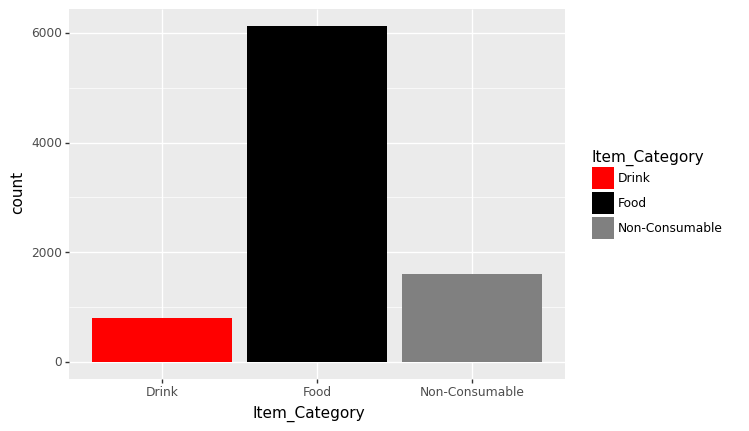

In [6]:
from plotnine import ggplot, aes, geom_bar, scale_fill_manual, geom_point

plot = (
    ggplot()
    + aes(x=train['Item_Category'], fill=train['Item_Category'])
    + scale_fill_manual(values=['red', 'black', 'gray'])
    + geom_bar()
)

# Exibir o gráfico
print(plot)

In [7]:
# Data binding

train.loc[train['Item_Identifier'] == 'Item_Weight', 'Item_Identifier'] = 'Others'
train.loc[train['Item_Identifier'] == 'Item_Fat_Content', 'Item_Identifier'] = 'Others'
train.loc[train['Item_Identifier'] == 'Item_Visibility', 'Item_Identifier'] = 'Others'
train.loc[train['Item_Identifier'] == 'Item_Type', 'Item_Identifier'] = 'Others'

In [8]:
train.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,Item_Category
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380,Food
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228,Drink
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700,Food
3,FDX07,19.20,Regular,0.066132,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800,Food
4,NCD19,8.93,Low Fat,0.066132,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052,Non-Consumable


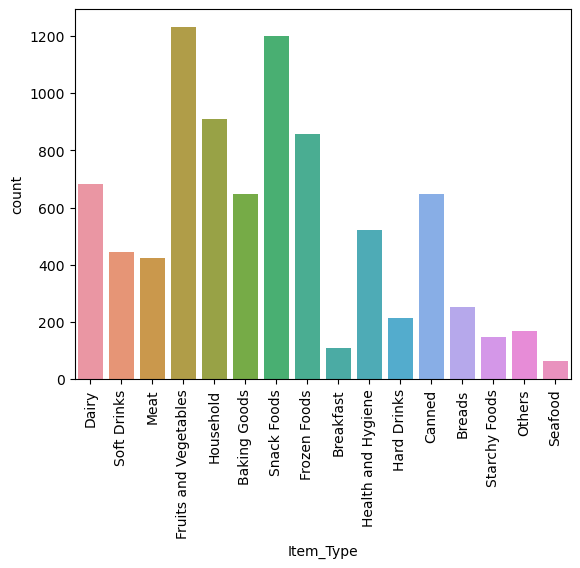

In [9]:
labels = list(train['Item_Type'].unique())
countbar = sns.countplot(train['Item_Type'])
countbar.set_xticklabels(labels=labels, rotation=90);

In [10]:
# Dez itens mais vendidos

pd.DataFrame(data=train, columns=(['Item_Identifier', 'Item_Outlet_Sales'])).head(10).groupby(by='Item_Identifier').sum().sort_values(by='Item_Outlet_Sales', ascending=False).round(2)

,Item_Outlet_Sales
Item_Identifier,
FDU28,4710.54
FDP10,4022.76
FDA15,3735.14
FDN15,2097.27
FDH17,1076.60
NCD19,994.71
FDX07,732.38
FDP36,556.61
DRC01,443.42


In [11]:
train['Outlet_Size'].isna().sum()

2410

In [12]:
Outlet_Type_Size = train.pivot_table(values='Outlet_Size',
                                                      columns='Outlet_Type',
                                                      aggfunc=lambda x: x.mode())
Outlet_Type_Size

Outlet_Type,Grocery Store,Supermarket Type1,Supermarket Type2,Supermarket Type3
Outlet_Size,Small,Small,Medium,Medium


In [13]:
missing_values = train['Outlet_Size'].isnull()
train.loc[missing_values, 'Outlet_Size'] = train.loc[missing_values, 'Outlet_Type'].apply(lambda x: Outlet_Type_Size[x].Outlet_Size)
train.isna().sum()

Item_Identifier                 0
Item_Weight                  1463
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                     0
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
Item_Category                   0
dtype: int64

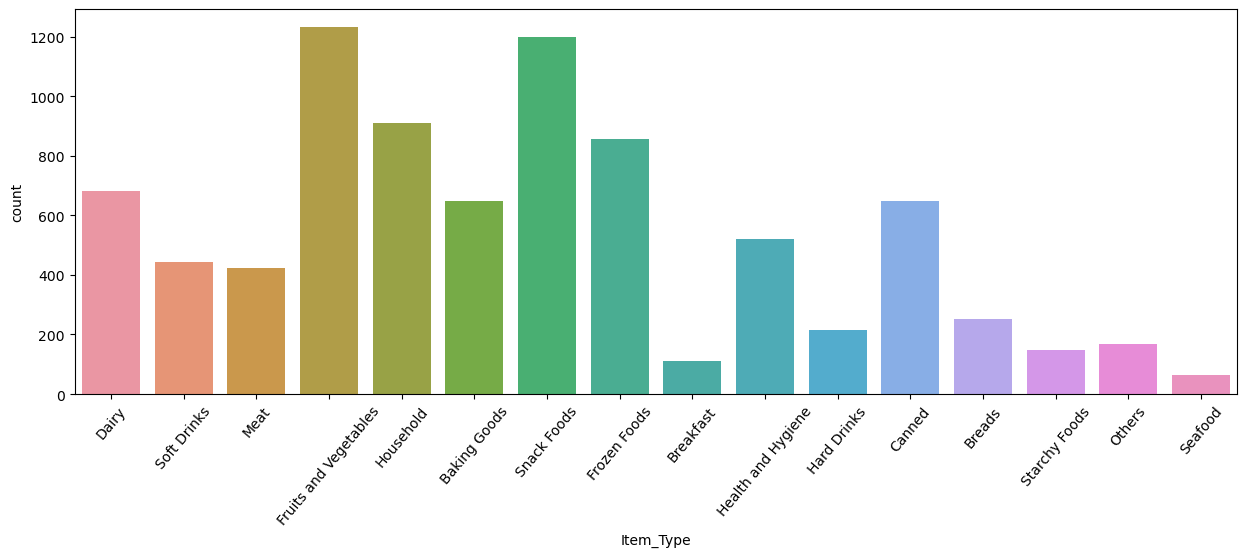

In [14]:
fig, axes = plt.subplots(figsize=(15, 5))
plt.xticks(rotation=50)
sns.countplot(train['Item_Type']);

In [15]:
# Receita obtida em cada categoria

pd.DataFrame(data=train, columns=(['Item_Type', 'Item_Outlet_Sales'])).groupby(by='Item_Type').sum().sort_values(by='Item_Outlet_Sales', ascending=False).round(2)

,Item_Outlet_Sales
Item_Type,
Fruits and Vegetables,2820059.82
Snack Foods,2732786.09
Household,2055493.71
Frozen Foods,1825734.79
Dairy,1522594.05
Canned,1444151.49
Baking Goods,1265525.34
Health and Hygiene,1045200.14
Meat,917565.61


In [16]:
train['Outlet_Establishment_Year'].unique()

array([1999, 2009, 1998, 1987, 1985, 2002, 2007, 1997, 2004], dtype=int64)

In [17]:
# Ha quantos anos ocorreu a venda, contando a partir de 2009

train['Outlet_Years'] = 2009 - train['Outlet_Establishment_Year']
train['Outlet_Years']

0       10
1        0
2       10
3       11
4       22
        ..
8518    22
8519     7
8520     5
8521     0
8522    12
Name: Outlet_Years, Length: 8523, dtype: int64

In [18]:
train.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,Item_Category,Outlet_Years
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380,Food,10
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228,Drink,0
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700,Food,10
3,FDX07,19.20,Regular,0.066132,Fruits and Vegetables,182.0950,OUT010,1998,Small,Tier 3,Grocery Store,732.3800,Food,11
4,NCD19,8.93,Low Fat,0.066132,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052,Non-Consumable,22


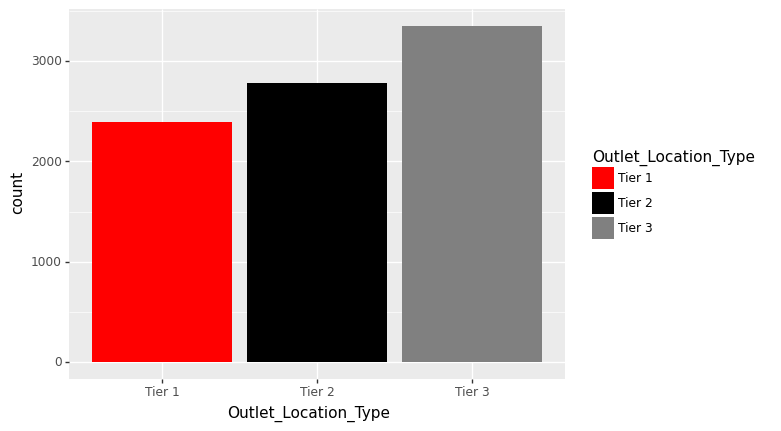

In [19]:
plot3 = (
    ggplot()
    + aes(x=train['Outlet_Location_Type'], fill=train['Outlet_Location_Type'])
    + scale_fill_manual(values=['red', 'black', 'gray'])
    + geom_bar()
)

print(plot3)

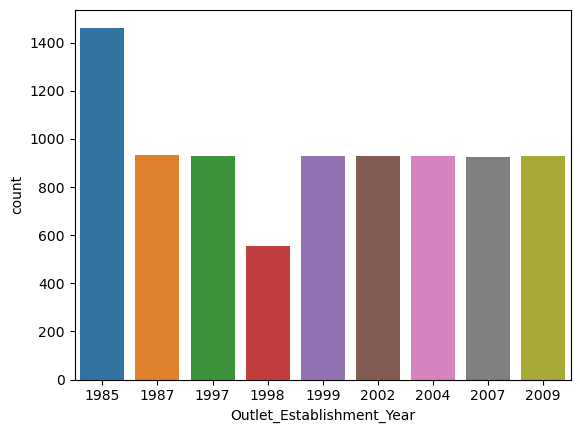

In [20]:
sns.countplot(train['Outlet_Establishment_Year']);

In [21]:
# Anos com maiores receitas

pd.DataFrame(data=train, columns=(['Outlet_Establishment_Year', 'Item_Outlet_Sales'])).groupby(by='Outlet_Establishment_Year').sum().sort_values(by='Item_Outlet_Sales', ascending=False).round(2)

,Item_Outlet_Sales
Outlet_Establishment_Year,
1985,3633620.14
2004,2268122.94
1999,2183969.81
2007,2167465.29
1987,2142663.58
1997,2118395.17
2002,2036725.48
2009,1851822.83
1998,188340.17


In [22]:
train['Item_Fat_Content'].unique()

array(['Low Fat', 'Regular', 'low fat', 'LF', 'reg'], dtype=object)

In [23]:
# Organizando a coluna Item_Fat_Content

train['Item_Fat_Content'].replace({'low fat':'Low Fat', 'LF':'Low Fat', 'reg':'Regular'}, inplace=True)
train['Item_Fat_Content'].value_counts()

Low Fat    5517
Regular    3006
Name: Item_Fat_Content, dtype: int64

In [24]:
train.isna().sum()

Item_Identifier                 0
Item_Weight                  1463
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                     0
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
Item_Category                   0
Outlet_Years                    0
dtype: int64

In [25]:
train['Item_Weight'].fillna(train['Item_Weight'].mean(), inplace=True)
train.isna().sum()

Item_Identifier              0
Item_Weight                  0
Item_Fat_Content             0
Item_Visibility              0
Item_Type                    0
Item_MRP                     0
Outlet_Identifier            0
Outlet_Establishment_Year    0
Outlet_Size                  0
Outlet_Location_Type         0
Outlet_Type                  0
Item_Outlet_Sales            0
Item_Category                0
Outlet_Years                 0
dtype: int64

In [26]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 14 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                8523 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                8523 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
 12  Item_Category              8523 non-null   object 
 13  Outlet_Years               8523 non-null   int64

In [27]:
encoder = LabelEncoder()

encodecol = ['Item_Identifier', 'Item_Type', 'Outlet_Identifier']

for col in encodecol:
    train[col] = encoder.fit_transform(train[col])

In [28]:
train.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,Item_Category,Outlet_Years
0,156,9.30,Low Fat,0.016047,4,249.8092,9,1999,Medium,Tier 1,Supermarket Type1,3735.1380,Food,10
1,8,5.92,Regular,0.019278,14,48.2692,3,2009,Medium,Tier 3,Supermarket Type2,443.4228,Drink,0
2,662,17.50,Low Fat,0.016760,10,141.6180,9,1999,Medium,Tier 1,Supermarket Type1,2097.2700,Food,10
3,1121,19.20,Regular,0.066132,6,182.0950,0,1998,Small,Tier 3,Grocery Store,732.3800,Food,11
4,1297,8.93,Low Fat,0.066132,9,53.8614,1,1987,High,Tier 3,Supermarket Type1,994.7052,Non-Consumable,22


In [29]:
train = pd.get_dummies(train, columns=['Item_Fat_Content', 'Outlet_Size', 'Outlet_Location_Type', 'Outlet_Type', 'Item_Category'])

In [30]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 24 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Item_Identifier                8523 non-null   int32  
 1   Item_Weight                    8523 non-null   float64
 2   Item_Visibility                8523 non-null   float64
 3   Item_Type                      8523 non-null   int32  
 4   Item_MRP                       8523 non-null   float64
 5   Outlet_Identifier              8523 non-null   int32  
 6   Outlet_Establishment_Year      8523 non-null   int64  
 7   Item_Outlet_Sales              8523 non-null   float64
 8   Outlet_Years                   8523 non-null   int64  
 9   Item_Fat_Content_Low Fat       8523 non-null   uint8  
 10  Item_Fat_Content_Regular       8523 non-null   uint8  
 11  Outlet_Size_High               8523 non-null   uint8  
 12  Outlet_Size_Medium             8523 non-null   u

In [31]:
train.head()

,Item_Identifier,Item_Weight,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Item_Outlet_Sales,Outlet_Years,Item_Fat_Content_Low Fat,...,Outlet_Location_Type_Tier 1,Outlet_Location_Type_Tier 2,Outlet_Location_Type_Tier 3,Outlet_Type_Grocery Store,Outlet_Type_Supermarket Type1,Outlet_Type_Supermarket Type2,Outlet_Type_Supermarket Type3,Item_Category_Drink,Item_Category_Food,Item_Category_Non-Consumable
0,156,9.30,0.016047,4,249.8092,9,1999,3735.1380,10,1,...,1,0,0,0,1,0,0,0,1,0
1,8,5.92,0.019278,14,48.2692,3,2009,443.4228,0,0,...,0,0,1,0,0,1,0,1,0,0
2,662,17.50,0.016760,10,141.6180,9,1999,2097.2700,10,1,...,1,0,0,0,1,0,0,0,1,0
3,1121,19.20,0.066132,6,182.0950,0,1998,732.3800,11,0,...,0,0,1,1,0,0,0,0,1,0
4,1297,8.93,0.066132,9,53.8614,1,1987,994.7052,22,1,...,0,0,1,0,1,0,0,0,0,1


In [32]:
corr_matrix = train.corr(method = 'spearman')
corr_matrix['Item_Outlet_Sales'].sort_values(ascending=False)

Item_Outlet_Sales                1.000000
Item_MRP                         0.562986
Outlet_Type_Supermarket Type3    0.268777
Outlet_Type_Supermarket Type1    0.208240
Outlet_Size_Medium               0.208096
Outlet_Identifier                0.204211
Outlet_Location_Type_Tier 2      0.108938
Outlet_Size_High                 0.047451
Outlet_Establishment_Year        0.042947
Item_Category_Food               0.026047
Item_Type                        0.019747
Item_Fat_Content_Regular         0.018787
Item_Weight                      0.013125
Item_Identifier                  0.007701
Outlet_Location_Type_Tier 3      0.005067
Item_Category_Non-Consumable    -0.001509
Outlet_Type_Supermarket Type2   -0.016072
Item_Fat_Content_Low Fat        -0.018787
Item_Category_Drink             -0.038162
Outlet_Years                    -0.042947
Outlet_Location_Type_Tier 1     -0.119286
Item_Visibility                 -0.120399
Outlet_Size_Small               -0.226772
Outlet_Type_Grocery Store       -0

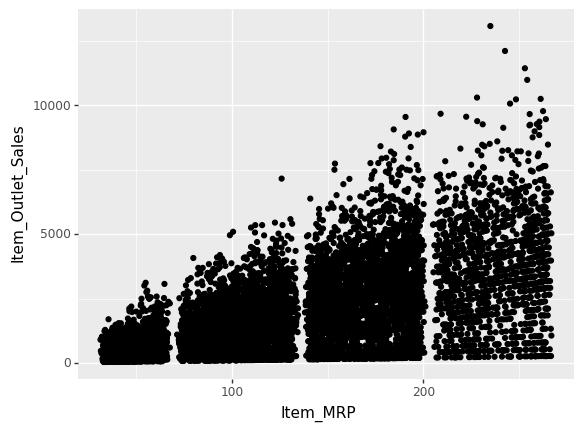

In [33]:
plot4 = (
    ggplot()
    + aes(x=train['Item_MRP'], y=train['Item_Outlet_Sales'])
    + geom_point()
)

print(plot4)

In [34]:
train['Item_Outlet_Sales'].describe()

count     8523.000000
mean      2181.288914
std       1706.499616
min         33.290000
25%        834.247400
50%       1794.331000
75%       3101.296400
max      13086.964800
Name: Item_Outlet_Sales, dtype: float64

In [35]:
train['Item_Outlet_Sales'].var()

2912140.938499716

In [36]:
# Amplitude

train['Item_Outlet_Sales'].max() - train['Item_Outlet_Sales'].min()

13053.674799999999

In [37]:
from scipy import stats

# Intervalo interquartil

iqr = stats.iqr(train['Item_Outlet_Sales'], interpolation = 'midpoint')
iqr

2267.049

In [38]:
# Desvio do quartil / Média do intervalo interquartil do target

qd = iqr / 2
qd

1133.5245

In [39]:
from sklearn.metrics import mean_absolute_percentage_error, r2_score
import scipy.stats as stats
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import RobustScaler
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import cross_validate
from sklearn.model_selection import cross_val_score
from xgboost import XGBRegressor
import pmdarima as pm
from sklearn.model_selection import train_test_split

In [40]:
# Dividindo o conjunto de dados

X = train[['Item_MRP', 'Outlet_Identifier', 'Outlet_Type_Grocery Store', 'Outlet_Type_Supermarket Type1',
           'Outlet_Type_Supermarket Type3', 'Outlet_Size_Medium']]

y = train['Item_Outlet_Sales']

In [41]:
X = np.log1p(X)
y = np.log1p(y)

In [42]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [43]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((6818, 6), (1705, 6), (6818,), (1705,))

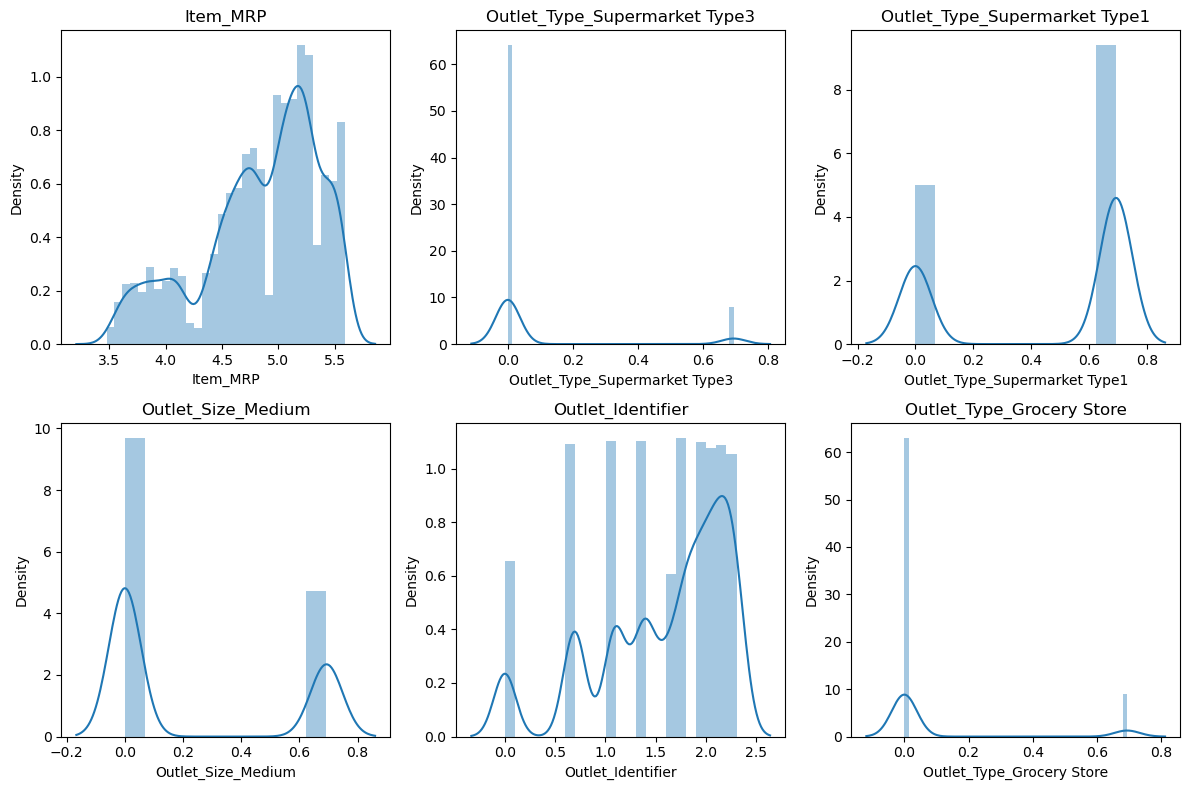

In [45]:
fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(12, 8))

# Criando os distplots
sns.distplot(X_train['Item_MRP'], ax=axes[0, 0])
axes[0, 0].set_title('Item_MRP')

sns.distplot(X_train['Outlet_Type_Supermarket Type3'], ax=axes[0, 1])
axes[0, 1].set_title('Outlet_Type_Supermarket Type3')

sns.distplot(X_train['Outlet_Type_Supermarket Type1'], ax=axes[0, 2])
axes[0, 2].set_title('Outlet_Type_Supermarket Type1')

sns.distplot(X_train['Outlet_Size_Medium'], ax=axes[1, 0])
axes[1, 0].set_title('Outlet_Size_Medium')

sns.distplot(X_train['Outlet_Identifier'], ax=axes[1, 1])
axes[1, 1].set_title('Outlet_Identifier')

sns.distplot(X_train['Outlet_Type_Grocery Store'], ax=axes[1, 2])
axes[1, 2].set_title('Outlet_Type_Grocery Store')

# Ajustando o espaçamento entre os subplots
plt.tight_layout()

# Exibindo o gráfico
plt.show()

In [46]:
from sklearn.preprocessing import MinMaxScaler

transformer = MinMaxScaler()
X_train_transformed = transformer.fit_transform(X_train)
X_test_transformed = transformer.transform(X_test)

In [47]:
X_train_transformed.shape, X_test_transformed.shape

((6818, 6), (1705, 6))

In [48]:
X_train_transformed = pd.DataFrame(X_train_transformed, columns=X.columns)

In [49]:
# Com nível de significância de 0.0009 aceitamos a hipótese alternativa
# que Item_MRP não é uma distribuição Gaussiana

import statsmodels
from statsmodels.stats.diagnostic import lilliefors

statsmodels.stats.diagnostic.lilliefors(X_train_transformed['Item_MRP'], dist='norm')

(0.10630178660678641, 0.0009999999999998899)

# Huber Regression

In [50]:
X_train_transformed

,Item_MRP,Outlet_Identifier,Outlet_Type_Grocery Store,Outlet_Type_Supermarket Type1,Outlet_Type_Supermarket Type3,Outlet_Size_Medium
0,0.791535,1.000000,0.0,1.0,0.0,1.0
1,0.789329,0.903090,0.0,1.0,0.0,0.0
2,0.590861,0.954243,0.0,1.0,0.0,0.0
3,0.131118,0.903090,0.0,1.0,0.0,0.0
4,0.746144,0.954243,0.0,1.0,0.0,0.0
...,...,...,...,...,...,...
6813,0.693916,0.000000,1.0,0.0,0.0,0.0
6814,0.408691,0.477121,0.0,1.0,0.0,0.0
6815,0.944800,0.903090,0.0,1.0,0.0,0.0
6816,0.616272,0.477121,0.0,1.0,0.0,0.0


In [181]:
# Huber Regressor menos sensível a valores atípicos e efeito alavanca

from sklearn.linear_model import HuberRegressor

huber = HuberRegressor(epsilon=4).fit(X_train_transformed, y_train)

In [182]:
huber.score(X_test_transformed, y_test)

0.7483205929711622

In [147]:
huber_pred = huber.predict(X_test_transformed)

In [148]:
huber_resid = y_test.values - huber_pred

In [149]:
huber_mape = mean_absolute_percentage_error(y_test, huber_pred)

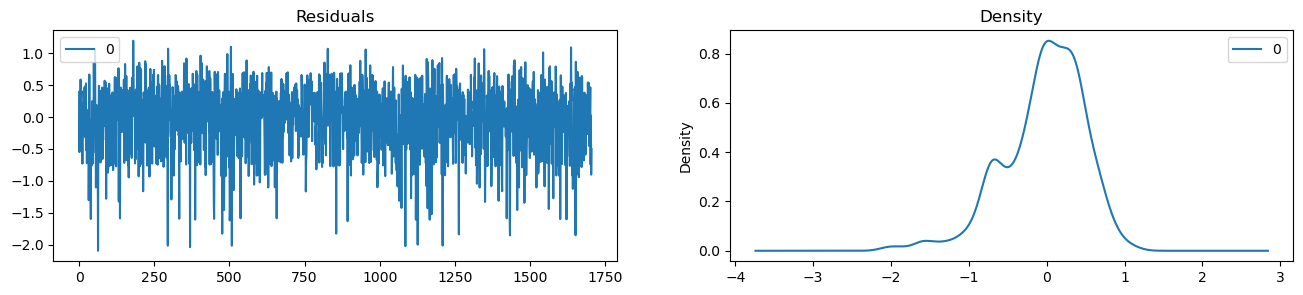

In [150]:
huber_resid = pd.DataFrame(huber_resid)

fig, ax = plt.subplots(1,2, figsize=(16,3))
huber_resid.plot(title="Residuals", ax=ax[0])
huber_resid.plot(kind='kde', title='Density', ax=ax[1]);

In [151]:
pipeline = make_pipeline(MinMaxScaler(), huber)

In [152]:
pipeline.fit(X_train_transformed, y_train)

Pipeline(steps=[('minmaxscaler', MinMaxScaler()),
                ('huberregressor', HuberRegressor(epsilon=2))])

In [153]:
y_hat = pipeline.predict(X_test_transformed)

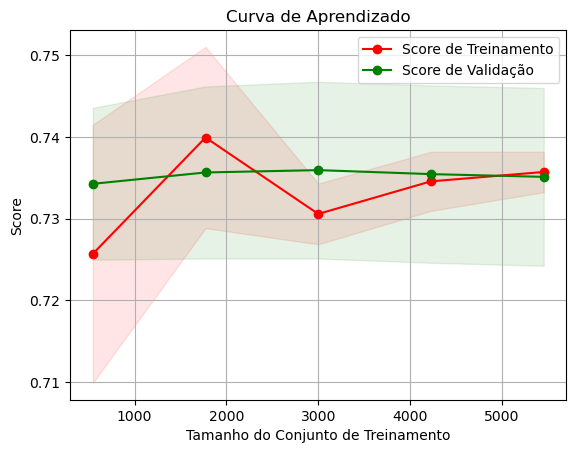

In [154]:
X, y = X_train_transformed, y_train

# Definir o modelo de aprendizado de máquina
model = HuberRegressor()

# Gerar as curvas de aprendizado
train_sizes, train_scores, test_scores = learning_curve(model, X, y, cv=5)

# Calcular as médias e desvios padrão dos scores de treinamento e validação
train_scores_mean = np.mean(train_scores, axis=1)
train_scores_std = np.std(train_scores, axis=1)
test_scores_mean = np.mean(test_scores, axis=1)
test_scores_std = np.std(test_scores, axis=1)

# Plotar as curvas de aprendizado
plt.figure()
plt.title("Curva de Aprendizado")
plt.xlabel("Tamanho do Conjunto de Treinamento")
plt.ylabel("Score")
plt.grid()

plt.fill_between(train_sizes, train_scores_mean - train_scores_std,
                 train_scores_mean + train_scores_std, alpha=0.1,
                 color="r")
plt.fill_between(train_sizes, test_scores_mean - test_scores_std,
                 test_scores_mean + test_scores_std, alpha=0.1, color="g")
plt.plot(train_sizes, train_scores_mean, 'o-', color="r",
         label="Score de Treinamento")
plt.plot(train_sizes, test_scores_mean, 'o-', color="g",
         label="Score de Validação")
plt.legend(loc="best")

plt.show()

## Análise Residual - Huber Regression

In [59]:
huber_resid = y_test - y_hat

In [60]:
# Como esperado, resíduos em torno de 0

huber_resid.mean()

-0.012594350807700475

In [63]:
train.shape, y_hat.shape, huber_resid.shape

((8523, 24), (1705,), (1705,))

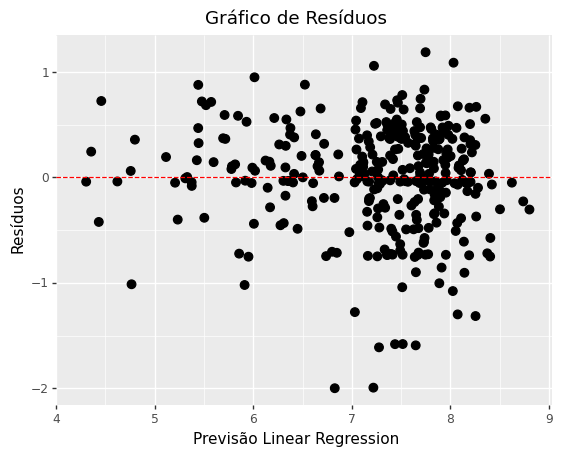

<ggplot: (768618)>

In [64]:
# Gráfico de resíduos atendendo a falta de padrão esperada

from plotnine import *

(ggplot(train[6818:])
 + geom_point(aes(x=y_hat, y=huber_resid), size=3)
 + geom_hline(yintercept=0, linetype='dashed', color='red')
 + labs(x='Previsão Linear Regression', y='Resíduos', title='Gráfico de Resíduos'))

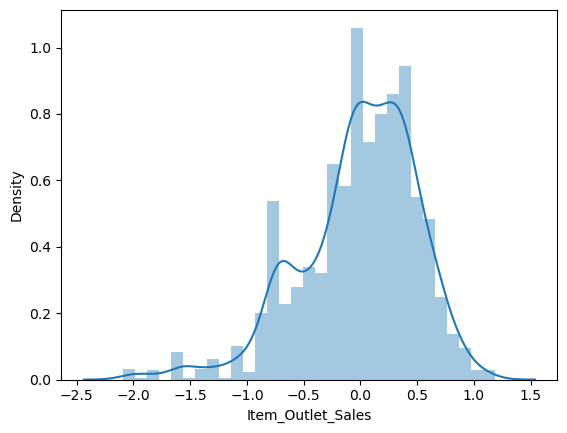

In [65]:
sns.distplot(huber_resid);

In [66]:
# Distribuição não Gaussiana

statsmodels.stats.diagnostic.lilliefors(huber_resid, dist='norm')

(0.08434386791814141, 0.0009999999999998899)

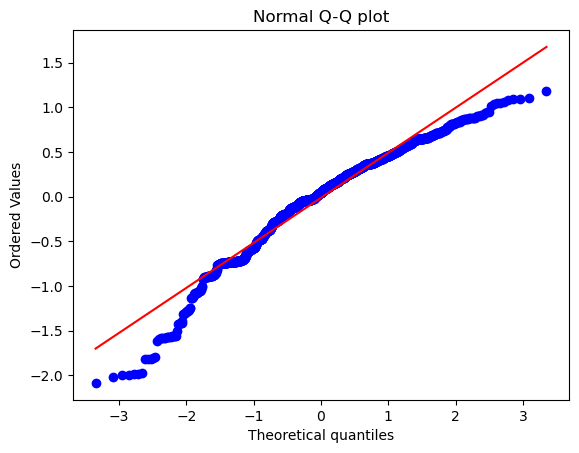

In [67]:
stats.probplot(huber_resid, dist='norm', plot=plt)
plt.title("Normal Q-Q plot")
plt.show()

In [68]:
# Não temos evidências suficientes para dizer que a heterocedasticidade é um problema no modelo de regressão.

from statsmodels.stats.diagnostic import het_goldfeldquandt

statsmodels.stats.diagnostic.het_goldfeldquandt(y_test, X_test_transformed, idx=None, split=None, drop=None, alternative='increasing', store=False)

(0.9965859457306857, 0.5198280794634642, 'increasing')

In [69]:
y_train.shape, X_train.shape

((6818,), (6818, 6))

In [70]:
import statsmodels.api as sm

model = sm.OLS(y_train, X_train)
result = model.fit()

influence = result.get_influence()
distance_cook = influence.cooks_distance[0]
leverage = influence.hat_matrix_diag
student_residue = influence.resid_studentized_external

# Imprime as medidas de influência
print("Distance Cook:", distance_cook)
print("Leverage:", leverage)
print("Student Residue:", student_residue)

Distance Cook: [9.23661022e-05 3.28292584e-06 2.18883890e-05 ... 2.76762780e-05
 5.68833326e-07 1.38380007e-05]
Leverage: [0.00114035 0.0004082  0.00045686 ... 0.00045148 0.00038094 0.00046106]
Student Residue: [-0.69670419  0.2196097  -0.53600668 ...  0.60630479  0.09462917
 -0.42423619]


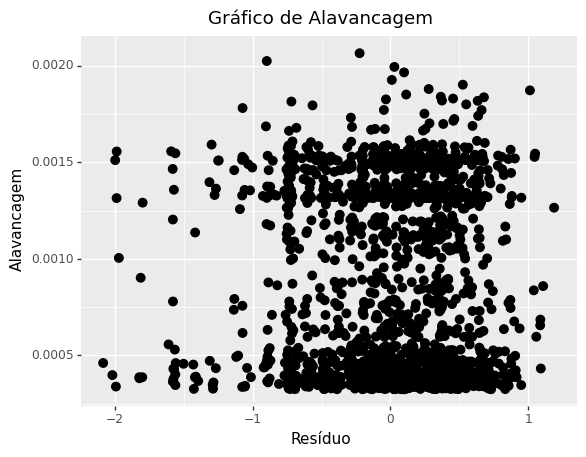

<ggplot: (39890685)>

In [71]:
(ggplot() +
 aes(x=huber_resid, y=leverage[5113:]) +
 geom_point(size=3) +
 labs(x="Resíduo", y="Alavancagem", title="Gráfico de Alavancagem"))

In [72]:
# Ausência de correlação

from statsmodels.stats.stattools import durbin_watson

durbin_watson(huber_resid, axis=0)

1.9575989154589246

In [73]:
y_test.shape, y_hat.shape

((1705,), (1705,))

In [74]:
from sklearn.metrics import mean_absolute_percentage_error

hubereg_mape = mean_absolute_percentage_error(y_test, y_hat)

In [75]:
hubereg_mape

0.05840927358921745

In [158]:
r2_huber = r2_score(y_test, y_hat)

In [215]:
r2_huber

0.7483205929711622

# Random Forest

In [785]:
forest = RandomForestRegressor(n_estimators=15, criterion='absolute_error', max_depth=7, bootstrap=True).fit(X_train_transformed, y_train)

In [786]:
#Pontuação do R²

r2_forest = forest.score(X_test_transformed, y_test)

In [787]:
r2_forest

0.7324721371971641

In [788]:
cv_results = cross_val_score(forest, X_test_transformed, y_test).mean()

cv_results

0.7225151438325732

In [789]:
forest_pred = forest.predict(X_test_transformed)

In [790]:
forest_pred

array([7.05142393, 6.50153466, 6.50153466, ..., 6.50153466, 6.34503368,
       7.39938553])

In [791]:
forest_mape = mean_absolute_percentage_error(y_test, forest_pred)

In [792]:
forest_mape

0.06002266873270538

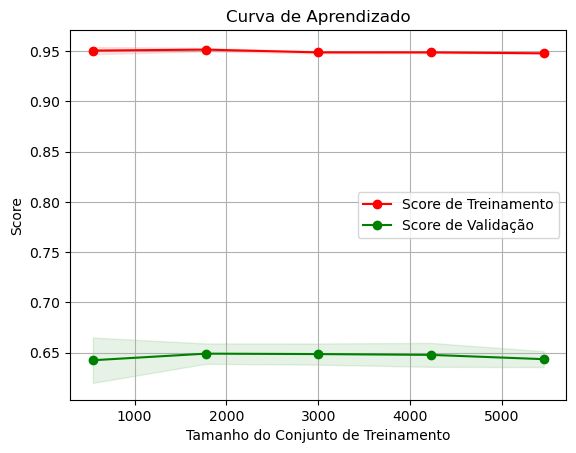

In [793]:
from sklearn.model_selection import learning_curve

X, y = X_train_transformed, y_train

# Definir o modelo de aprendizado de máquina
model = RandomForestRegressor()

# Gerar as curvas de aprendizado
train_sizes, train_scores, test_scores = learning_curve(model, X, y, cv=5)

# Calcular as médias e desvios padrão dos scores de treinamento e validação
train_scores_mean = np.mean(train_scores, axis=1)
train_scores_std = np.std(train_scores, axis=1)
test_scores_mean = np.mean(test_scores, axis=1)
test_scores_std = np.std(test_scores, axis=1)

# Plotar as curvas de aprendizado
plt.figure()
plt.title("Curva de Aprendizado")
plt.xlabel("Tamanho do Conjunto de Treinamento")
plt.ylabel("Score")
plt.grid()

plt.fill_between(train_sizes, train_scores_mean - train_scores_std,
                 train_scores_mean + train_scores_std, alpha=0.1,
                 color="r")
plt.fill_between(train_sizes, test_scores_mean - test_scores_std,
                 test_scores_mean + test_scores_std, alpha=0.1, color="g")
plt.plot(train_sizes, train_scores_mean, 'o-', color="r",
         label="Score de Treinamento")
plt.plot(train_sizes, test_scores_mean, 'o-', color="g",
         label="Score de Validação")
plt.legend(loc="best")

plt.show()

## Análise de Resíduos - Forest

In [86]:
residuals_forest = y_test - forest_pred

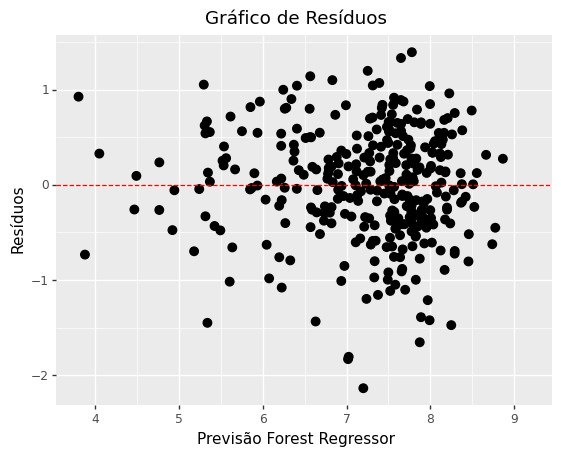

<ggplot: (36094615)>

In [87]:
(ggplot(train[6818:])
 + geom_point(aes(x=forest_pred, y=residuals_forest), size=3)
 + geom_hline(yintercept=0, linetype='dashed', color='red')
 + labs(x='Previsão Forest Regressor', y='Resíduos', title='Gráfico de Resíduos'))

In [88]:
residuals_forest.mean()

-0.0022160253045753336

In [89]:
# Homoscedasticidade atendida

statistics, p_valor, indexes = het_goldfeldquandt(residuals_forest,  X_test_transformed)

print("Test statistics:", statistics)
print("Value-P:", p_valor)

Test statistics: 0.9820371646878912
Value-P: 0.6039532718612086


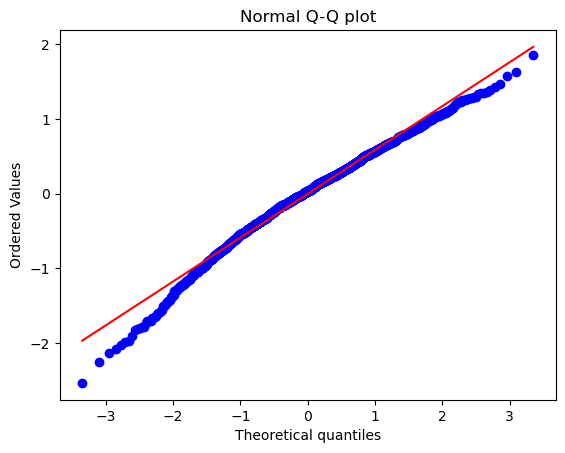

In [90]:
stats.probplot(residuals_forest, dist='norm', plot=plt)
plt.title("Normal Q-Q plot")
plt.show()

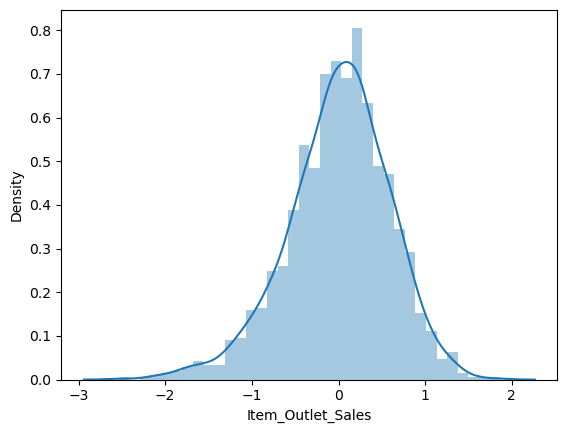

In [91]:
sns.distplot(residuals_forest);

In [92]:
lilliefors(residuals_forest, dist='norm')

(0.04487516310844064, 0.0009999999999998899)

In [93]:
# Correlação considerada normal

durbin_watson(residuals_forest, axis=0)

2.00390090118472

In [94]:
residuals_forest.shape, leverage.shape

((1705,), (6818,))

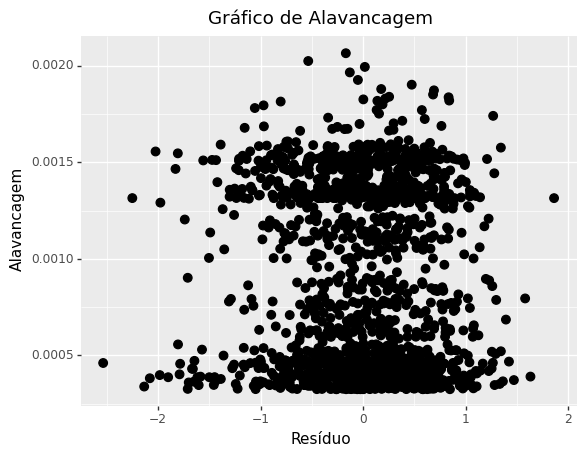

<ggplot: (36194804)>

In [95]:
(ggplot() +
 aes(x=residuals_forest, y=leverage[5113:]) +
 geom_point(size=3) +
 labs(x="Resíduo", y="Alavancagem", title="Gráfico de Alavancagem"))

# XGBoostRegressor

In [96]:
X_train_transformed.shape, y_train.shape, X_test_transformed.shape, y_test.shape

((6818, 6), (6818,), (1705, 6), (1705,))

In [97]:
X_test_transformed = pd.DataFrame(X_test_transformed, columns=X_test.columns)

In [573]:
xgb_reg = XGBRegressor(max_depth=2, n_estimators=60, learning_rate=0.1)

xgb_reg.fit(X_train_transformed, y_train,
            eval_metric='mape',
            #Avalia a perda em cada iteração
            eval_set=[(X_train_transformed, y_train), (X_test_transformed, y_test)],  
            #Para de iterar quando a perda de avaliação aumenta 30 vezes seguidas
            early_stopping_rounds=30
            )

[0]	validation_0-mape:0.83622	validation_1-mape:0.83521
[1]	validation_0-mape:0.75183	validation_1-mape:0.75041
[2]	validation_0-mape:0.67588	validation_1-mape:0.67425
[3]	validation_0-mape:0.60753	validation_1-mape:0.60567
[4]	validation_0-mape:0.54601	validation_1-mape:0.54409
[5]	validation_0-mape:0.49065	validation_1-mape:0.48847
[6]	validation_0-mape:0.44083	validation_1-mape:0.43862
[7]	validation_0-mape:0.39600	validation_1-mape:0.39356
[8]	validation_0-mape:0.35565	validation_1-mape:0.35320
[9]	validation_0-mape:0.31937	validation_1-mape:0.31688
[10]	validation_0-mape:0.28677	validation_1-mape:0.28438
[11]	validation_0-mape:0.25757	validation_1-mape:0.25517
[12]	validation_0-mape:0.23132	validation_1-mape:0.22902
[13]	validation_0-mape:0.20831	validation_1-mape:0.20594
[14]	validation_0-mape:0.18789	validation_1-mape:0.18559
[15]	validation_0-mape:0.16995	validation_1-mape:0.16777
[16]	validation_0-mape:0.15408	validation_1-mape:0.15197
[17]	validation_0-mape:0.14043	validation

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.1, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=2, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             n_estimators=60, n_jobs=None, num_parallel_tree=None,
             predictor=None, random_state=None, ...)

In [574]:
xgb_pred = xgb_reg.predict(X_test_transformed)

In [575]:
xgb_mape = mean_absolute_percentage_error(y_test, xgb_pred)

In [576]:
r2_xgb = xgb_reg.score(X_test_transformed, y_test)

In [577]:
r2_xgb

0.7434137864949231

In [578]:
xgb_mape

0.05917954265553529

In [558]:
xgb_residuals = y_test - xgb_pred

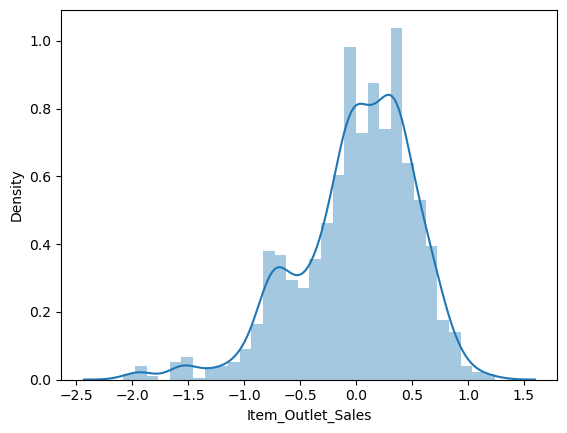

In [559]:
sns.distplot(xgb_residuals);

In [560]:
xgb_residuals.mean()

0.0006924376939550472

In [561]:
# Há Autocorrelação inferior nos resíduos 

from statsmodels.stats.stattools import durbin_watson

durbin_watson(xgb_residuals, axis=0)

1.9549900252242678

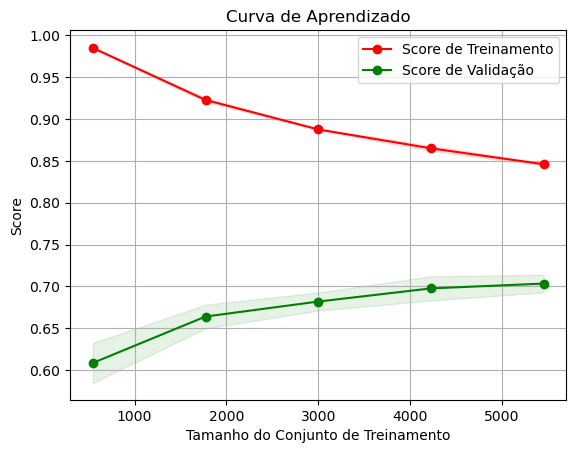

In [562]:
X, y = X_train_transformed, y_train

# Definir o modelo de aprendizado de máquina
model = XGBRegressor()

# Gerar as curvas de aprendizado
train_sizes, train_scores, test_scores = learning_curve(model, X, y, cv=5)

# Calcular as médias e desvios padrão dos scores de treinamento e validação
train_scores_mean = np.mean(train_scores, axis=1)
train_scores_std = np.std(train_scores, axis=1)
test_scores_mean = np.mean(test_scores, axis=1)
test_scores_std = np.std(test_scores, axis=1)

# Plotar as curvas de aprendizado
plt.figure()
plt.title("Curva de Aprendizado")
plt.xlabel("Tamanho do Conjunto de Treinamento")
plt.ylabel("Score")
plt.grid()

plt.fill_between(train_sizes, train_scores_mean - train_scores_std,
                 train_scores_mean + train_scores_std, alpha=0.1,
                 color="r")
plt.fill_between(train_sizes, test_scores_mean - test_scores_std,
                 test_scores_mean + test_scores_std, alpha=0.1, color="g")
plt.plot(train_sizes, train_scores_mean, 'o-', color="r",
         label="Score de Treinamento")
plt.plot(train_sizes, test_scores_mean, 'o-', color="g",
         label="Score de Validação")
plt.legend(loc="best")

plt.show()

## Análise Residual - XGBRegressor

In [143]:
train.shape, xgb_pred.shape, xgb_residuals.shape

((8523, 24), (1705,), (1705,))

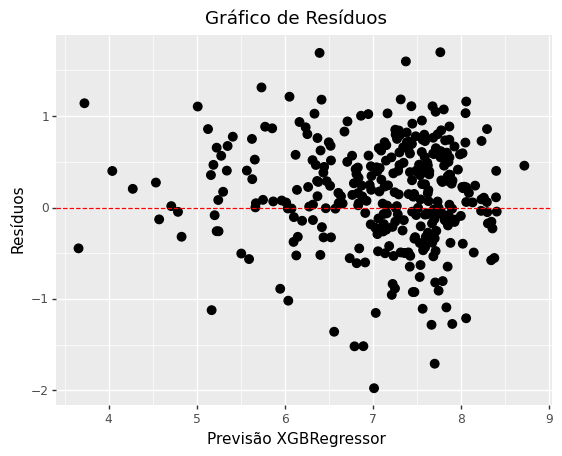

<ggplot: (45711321)>

In [142]:
(ggplot(train[6818:])
 + geom_point(aes(x=xgb_pred, y=xgb_residuals), size=3)
 + geom_hline(yintercept=0, linetype='dashed', color='red')
 + labs(x='Previsão XGBRegressor', y='Resíduos', title='Gráfico de Resíduos'))

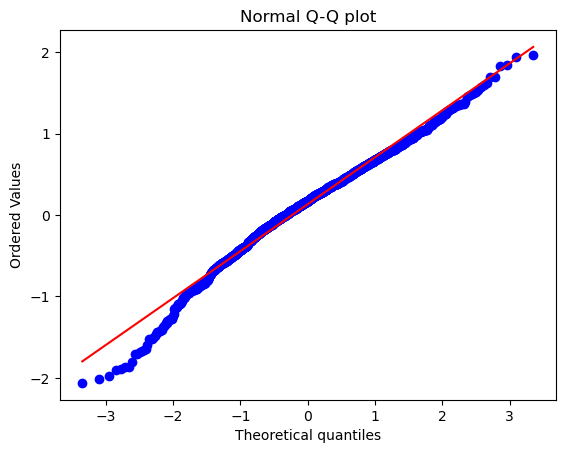

In [109]:
stats.probplot(xgb_residuals, dist='norm', plot=plt)
plt.title("Normal Q-Q plot")
plt.show()

In [110]:
# Resíduo não Gaussiano

lilliefors(xgb_residuals, dist='norm')

(0.045683170388196526, 0.0009999999999998899)

In [111]:
xgb_residuals.mean()

0.1339597606369633

In [112]:
# Não temos evidências suficientes para dizer que a HETEROSCEDASTICIDADE é um problema no modelo XGBRegressor

statistics, p_value, indexes = het_goldfeldquandt(xgb_residuals, X_test_transformed)
print("Test statistics:", statistics)
print("Value-P:", p_value)

Test statistics: 0.9640851816842015
Value-P: 0.7025990647700115


In [113]:
# Resíduos sem correlação 

durbin_watson(xgb_residuals, axis=0)

1.9026769835546686

In [114]:
xgb_residuals.shape, leverage.shape

((1705,), (6818,))

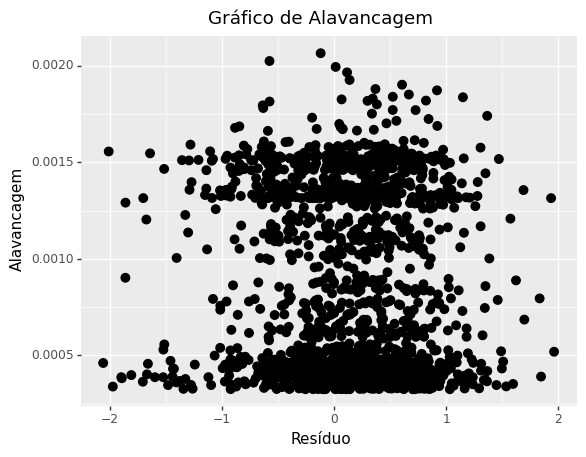

<ggplot: (769332)>

In [115]:
(ggplot() +
 aes(x=xgb_residuals, y=leverage[5113:]) +
 geom_point(size=3) +
 labs(x="Resíduo", y="Alavancagem", title="Gráfico de Alavancagem"))

# SVM

In [364]:
from sklearn.svm import SVR

svr = SVR(epsilon=0.1, C=1, kernel='linear').fit(X_train_transformed, y_train)

In [365]:
r2_svr = svr.score(X_test_transformed, y_test)

In [366]:
svr_predict = svr.predict(X_test_transformed)

In [367]:
svr_mape = mean_absolute_percentage_error(y_test, svr_predict)

In [368]:
svr_mape

0.058765945972947764

In [369]:
r2_svr

0.7423995810764461

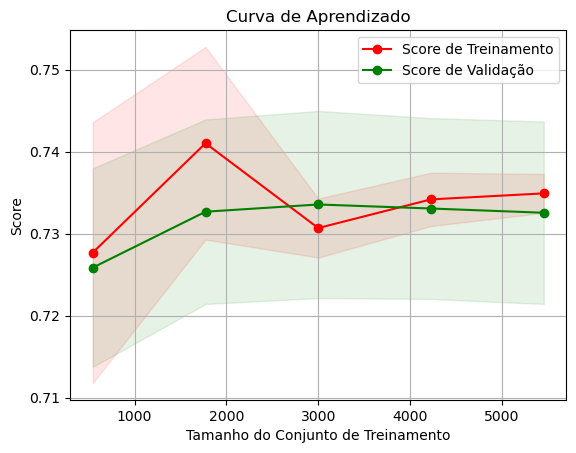

In [356]:
X, y = X_train_transformed, y_train

# Definir o modelo de aprendizado de máquina
model = SVR()

# Gerar as curvas de aprendizado
train_sizes, train_scores, test_scores = learning_curve(model, X, y, cv=5)

# Calcular as médias e desvios padrão dos scores de treinamento e validação
train_scores_mean = np.mean(train_scores, axis=1)
train_scores_std = np.std(train_scores, axis=1)
test_scores_mean = np.mean(test_scores, axis=1)
test_scores_std = np.std(test_scores, axis=1)

# Plotar as curvas de aprendizado
plt.figure()
plt.title("Curva de Aprendizado")
plt.xlabel("Tamanho do Conjunto de Treinamento")
plt.ylabel("Score")
plt.grid()

plt.fill_between(train_sizes, train_scores_mean - train_scores_std,
                 train_scores_mean + train_scores_std, alpha=0.1,
                 color="r")
plt.fill_between(train_sizes, test_scores_mean - test_scores_std,
                 test_scores_mean + test_scores_std, alpha=0.1, color="g")
plt.plot(train_sizes, train_scores_mean, 'o-', color="r",
         label="Score de Treinamento")
plt.plot(train_sizes, test_scores_mean, 'o-', color="g",
         label="Score de Validação")
plt.legend(loc="best")

plt.show()

## Análise Residual - SVM

In [370]:
svr_residuals = y_test - svr_predict

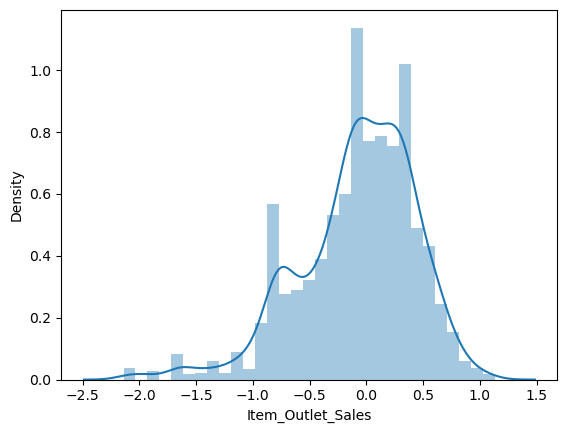

In [371]:
sns.distplot(svr_residuals);

In [372]:
svr_residuals.mean()

-0.07900290729275768

In [373]:
train.shape, svr_predict.shape, svr_residuals.shape

((8523, 24), (1705,), (1705,))

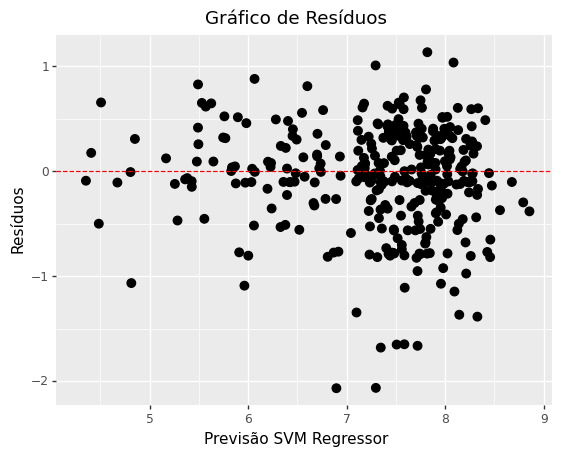

<ggplot: (65454219)>

In [374]:
(ggplot(train[6818:])
 + geom_point(aes(x=svr_predict, y=svr_residuals), size=3)
 + geom_hline(yintercept=0, linetype='dashed', color='red')
 + labs(x='Previsão SVM Regressor', y='Resíduos', title='Gráfico de Resíduos'))

In [375]:
# Não há evidências de autocorrelação nos resíduos

durbin_watson(svr_residuals, axis=0)

1.9133229350408338

In [376]:
# Distribuição não normal dos resíduos

statsmodels.stats.diagnostic.lilliefors(svr_residuals, dist='norm')

(0.08577308911353143, 0.0009999999999998899)

In [377]:
# Não temos evidências suficientes para dizer que a HETEROSCEDASTICIDADE é um problema.
# p-value muito maior que 0.05

statsmodels.stats.diagnostic.het_goldfeldquandt(y_test, X_test_transformed, idx=None, split=None, drop=None, alternative='increasing', store=False)

(0.9965859457306857, 0.5198280794634642, 'increasing')

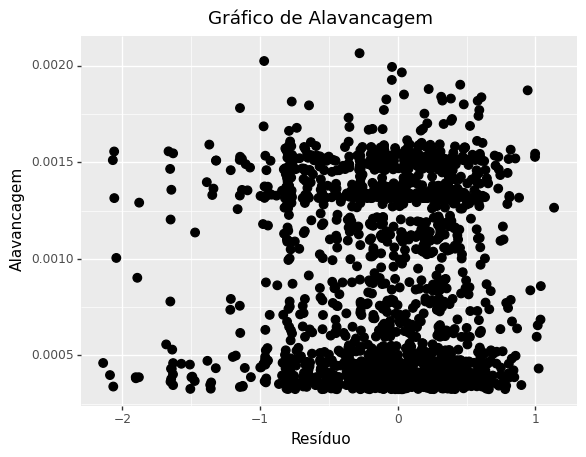

<ggplot: (65449210)>

In [378]:
(ggplot() +
 aes(x=svr_residuals, y=leverage[5113:]) +
 geom_point(size=3) +
 labs(x="Resíduo", y="Alavancagem", title="Gráfico de Alavancagem"))

# Deep Learning

In [794]:
X_train_transformed.shape, y_train.shape, X_test_transformed.shape, y_test.shape

((6818, 6), (6818,), (1705, 6), (1705,))

In [808]:
from tensorflow.keras.layers import LSTM
from tensorflow.keras.models import Sequential
from tensorflow.keras import layers, callbacks

# Deep learning LSTM(Long Short Term Memory).
# batch_size=16 pega 16 amostras por teste.
# epochs=1000 quantidade de vezes que será treinado.
# Validation_split=0.3 separa 30% dos dados para o conjunto de validação.

deepLSTM = Sequential()
deepLSTM.add(LSTM(units=3, activation='relu', input_shape=(6,1)))
deepLSTM.add(layers.Dense(1, activation="linear"))

deepLSTM.compile(loss='mae', optimizer='adam')

es = callbacks.EarlyStopping(patience=10, restore_best_weights=True)

deepLSTM.fit(X_train_transformed, y_train,
          batch_size=16,
          epochs=1000,
          validation_split=0.3,
          callbacks=[es],
          verbose=1,
          validation_data=(X_test_transformed, y_test))

Epoch 1/1000
427/427 [==============================] - 3s 3ms/step - loss: 3.0954 - val_loss: 0.8292
Epoch 2/1000
427/427 [==============================] - 1s 3ms/step - loss: 0.7504 - val_loss: 0.7177
Epoch 3/1000
427/427 [==============================] - 1s 3ms/step - loss: 0.6815 - val_loss: 0.6806
Epoch 4/1000
427/427 [==============================] - 1s 3ms/step - loss: 0.6705 - val_loss: 0.6761
Epoch 5/1000
427/427 [==============================] - 1s 3ms/step - loss: 0.6687 - val_loss: 0.6730
Epoch 6/1000
427/427 [==============================] - 1s 3ms/step - loss: 0.6671 - val_loss: 0.6783
Epoch 7/1000
427/427 [==============================] - 1s 3ms/step - loss: 0.6642 - val_loss: 0.6690
Epoch 8/1000
427/427 [==============================] - 1s 3ms/step - loss: 0.6572 - val_loss: 0.6623
Epoch 9/1000
427/427 [==============================] - 1s 3ms/step - loss: 0.6546 - val_loss: 0.6613
Epoch 10/1000
427/427 [==============================] - 1s 3ms/step - loss: 0.650

427/427 [==============================] - 1s 3ms/step - loss: 0.4203 - val_loss: 0.4107
Epoch 81/1000
427/427 [==============================] - 1s 3ms/step - loss: 0.4155 - val_loss: 0.4171
Epoch 82/1000
427/427 [==============================] - 1s 3ms/step - loss: 0.4125 - val_loss: 0.4211
Epoch 83/1000
427/427 [==============================] - 1s 3ms/step - loss: 0.4137 - val_loss: 0.4054
Epoch 84/1000
427/427 [==============================] - 1s 3ms/step - loss: 0.4125 - val_loss: 0.4088
Epoch 85/1000
427/427 [==============================] - 1s 3ms/step - loss: 0.4151 - val_loss: 0.4076
Epoch 86/1000
427/427 [==============================] - 1s 3ms/step - loss: 0.4126 - val_loss: 0.4058
Epoch 87/1000
427/427 [==============================] - 1s 3ms/step - loss: 0.4129 - val_loss: 0.4438
Epoch 88/1000
427/427 [==============================] - 1s 3ms/step - loss: 0.4136 - val_loss: 0.4159
Epoch 89/1000
427/427 [==============================] - 1s 3ms/step - loss: 0.4152 - v

In [809]:
deepLSTMpred = deepLSTM.predict(X_test_transformed)

54/54 [==============================] - 0s 1ms/step


In [810]:
deep_LSTM_mape = mean_absolute_percentage_error(y_test, deepLSTMpred)

In [811]:
deepLSTMpred = pd.DataFrame(deepLSTMpred)

In [812]:
r2_lstm = r2_score(y_test, deepLSTMpred)

In [813]:
score = {'Model': ['Huber Regression', 'Deep Learning LSTM', 'Random Forest', 'XGBRegressor', 'SVR'],
         'Score Mape': [hubereg_mape, deep_LSTM_mape, forest_mape, xgb_mape, svr_mape],
         'R2 Score': [r2_huber, r2_lstm, r2_forest, r2_xgb, r2_svr]}

In [814]:
r2_huber = huber.score(X_test_transformed, y_test)

In [815]:
r2_svr = svr.score(X_test_transformed, y_test)

In [816]:
r2_xgb = xgb_reg.score(X_test_transformed, y_test)

In [817]:
r2_forest = forest.score(X_test_transformed, y_test)

In [818]:
df_score = pd.DataFrame(score)

In [819]:
df_score = round(df_score.sort_values('Score Mape'), 2)

In [820]:
df_score

,Model,Score Mape,R2 Score
0,Huber Regression,0.06,0.75
4,SVR,0.06,0.74
3,XGBRegressor,0.06,0.74
2,Random Forest,0.06,0.73
1,Deep Learning LSTM,0.06,0.73


In [ ]:
# Único "problema" encontrado na análise de resíduo foi a distribuição não Gaussiana
# Modelo Random Forest sofrendo Overfiting